In [602]:
%matplotlib inline
from sklearn import linear_model
import statsmodels.formula.api as smf
from IPython.display import display
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

In [603]:
NY_Crime = pd.read_csv('NYM.csv')
NY_Crime.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,nan
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,nan


In [604]:
NY_Crime.columns = NY_Crime.iloc[3]
NY_Crime.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,nan
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,nan


In [605]:
NY_Crime = NY_Crime.drop(NY_Crime.index[:4])
NY_Crime.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,nan
5,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0,nan
6,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0,nan
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN,nan
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN,nan


In [606]:
NY_Crime = NY_Crime.reset_index(drop=True)
NY_Crime.index.name = None
NY_Crime['Population'] = NY_Crime['Population'].str.replace(",", "")
NY_Crime.head(400)

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0,nan
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0,nan
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0,nan
3,Albany,97956,791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN,nan
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN,nan
5,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN,nan
6,Allegany Village,1781,3,0,NaN,0,0,3,10,0,10,0,0,nan
7,Amherst Town,118296,107,1,NaN,7,31,68,"2,118",204,"1,882",32,3,nan
8,Amityville Village,9519,9,0,NaN,2,4,3,210,16,188,6,1,nan
9,Amsterdam,18182,30,0,NaN,0,12,18,405,99,291,15,0,nan


In [607]:
NY_Crime.fillna(0, inplace=True)
NY_Crime.drop(NY_Crime.index[348:], inplace=True)
NY_Crime.head(400)

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
0,Adams Village,1861,0,0,0,0,0,0,12,2,10,0,0,0.000
1,Addison Town and Village,2577,3,0,0,0,0,3,24,3,20,1,0,0.000
2,Akron Village,2846,3,0,0,0,0,3,16,1,15,0,0,0.000
3,Albany,97956,791,8,0,30,227,526,"4,090",705,"3,243",142,0,0.000
4,Albion Village,6388,23,0,0,3,4,16,223,53,165,5,0,0.000
5,Alfred Village,4089,5,0,0,0,3,2,46,10,36,0,0,0.000
6,Allegany Village,1781,3,0,0,0,0,3,10,0,10,0,0,0.000
7,Amherst Town,118296,107,1,0,7,31,68,"2,118",204,"1,882",32,3,0.000
8,Amityville Village,9519,9,0,0,2,4,3,210,16,188,6,1,0.000
9,Amsterdam,18182,30,0,0,0,12,18,405,99,291,15,0,0.000


In [608]:
NY_Crime['Population'] = NY_Crime.Population.astype(int)

In [609]:
NY_Crime['Population2'] = (NY_Crime['Population'])*(NY_Crime['Population'])
NY_Crime.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan,Population2
0,Adams Village,1861,0,0,0,0,0,0,12,2,10,0,0,0.000,3463321
1,Addison Town and Village,2577,3,0,0,0,0,3,24,3,20,1,0,0.000,6640929
2,Akron Village,2846,3,0,0,0,0,3,16,1,15,0,0,0.000,8099716
3,Albany,97956,791,8,0,30,227,526,"4,090",705,"3,243",142,0,0.000,1005443344
4,Albion Village,6388,23,0,0,3,4,16,223,53,165,5,0,0.000,40806544


In [610]:
NY_Crime.rename(columns = {"Murder and\nnonnegligent\nmanslaughter" : 'Murder'}, inplace=True)
NY_Crime.rename(columns = {"Property\ncrime" : 'Property_Crime'}, inplace=True)
NY_Crime.head()

3,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan,Population2
0,Adams Village,1861,0,0,0,0,0,0,12,2,10,0,0,0.000,3463321
1,Addison Town and Village,2577,3,0,0,0,0,3,24,3,20,1,0,0.000,6640929
2,Akron Village,2846,3,0,0,0,0,3,16,1,15,0,0,0.000,8099716
3,Albany,97956,791,8,0,30,227,526,"4,090",705,"3,243",142,0,0.000,1005443344
4,Albion Village,6388,23,0,0,3,4,16,223,53,165,5,0,0.000,40806544


In [611]:

NY_Crime['Murder'] = NY_Crime['Murder'].str.replace(",", "")
NY_Crime['Robbery'] = NY_Crime['Robbery'].str.replace(",", "")
NY_Crime['Property_Crime'] = NY_Crime['Property_Crime'].str.replace(",", "")
NY_Crime['Property_Crime'] = NY_Crime['Property_Crime'].astype(int)
NY_Crime['Murder'] = NY_Crime['Murder'].astype(int)
NY_Crime['Robbery'] = NY_Crime['Robbery'].astype(int)
NY_Crime['Property_Crime'] = NY_Crime['Property_Crime'].apply(lambda x: x if x < 3000 else 0)

In [612]:
NY_Crime['Murder2'] = NY_Crime['Murder'].apply(lambda x: 'Coded 1' if x > 0 else 'Coded 0')
NY_Crime.head()

3,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan,Population2,Murder2
0,Adams Village,1861,0,0,0,0,0,0,12,2,10,0,0,0.000,3463321,Coded 0
1,Addison Town and Village,2577,3,0,0,0,0,3,24,3,20,1,0,0.000,6640929,Coded 0
2,Akron Village,2846,3,0,0,0,0,3,16,1,15,0,0,0.000,8099716,Coded 0
3,Albany,97956,791,8,0,30,227,526,0,705,"3,243",142,0,0.000,1005443344,Coded 1
4,Albion Village,6388,23,0,0,3,4,16,223,53,165,5,0,0.000,40806544,Coded 0


In [613]:
NY_Crime['Robbery2'] = NY_Crime['Robbery'].apply(lambda x: 'Coded 1' if x > 0 else 'Coded 0')
NY_Crime.head(400)

3,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan,Population2,Murder2,Robbery2
0,Adams Village,1861,0,0,0,0,0,0,12,2,10,0,0,0.000,3463321,Coded 0,Coded 0
1,Addison Town and Village,2577,3,0,0,0,0,3,24,3,20,1,0,0.000,6640929,Coded 0,Coded 0
2,Akron Village,2846,3,0,0,0,0,3,16,1,15,0,0,0.000,8099716,Coded 0,Coded 0
3,Albany,97956,791,8,0,30,227,526,0,705,"3,243",142,0,0.000,1005443344,Coded 1,Coded 1
4,Albion Village,6388,23,0,0,3,4,16,223,53,165,5,0,0.000,40806544,Coded 0,Coded 1
5,Alfred Village,4089,5,0,0,0,3,2,46,10,36,0,0,0.000,16719921,Coded 0,Coded 1
6,Allegany Village,1781,3,0,0,0,0,3,10,0,10,0,0,0.000,3171961,Coded 0,Coded 0
7,Amherst Town,118296,107,1,0,7,31,68,2118,204,"1,882",32,3,0.000,1109041728,Coded 1,Coded 1
8,Amityville Village,9519,9,0,0,2,4,3,210,16,188,6,1,0.000,90611361,Coded 0,Coded 1
9,Amsterdam,18182,30,0,0,0,12,18,405,99,291,15,0,0.000,330585124,Coded 0,Coded 1


In [614]:
NY_Crime = NY_Crime[['City', 'Population', 'Population2', 'Murder2', 'Robbery2', 'Property_Crime']]
NY_Crime.head()

3,City,Population,Population2,Murder2,Robbery2,Property_Crime
0,Adams Village,1861,3463321,Coded 0,Coded 0,12
1,Addison Town and Village,2577,6640929,Coded 0,Coded 0,24
2,Akron Village,2846,8099716,Coded 0,Coded 0,16
3,Albany,97956,1005443344,Coded 1,Coded 1,0
4,Albion Village,6388,40806544,Coded 0,Coded 1,223


In [615]:
pd.options.display.float_format = '{:.3f}'.format
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [616]:
regr = linear_model.LinearRegression()
y = NY_Crime['Property_Crime'].values.reshape(-1,1)
x = NY_Crime[['Population', 'Population2']]

regr.fit(x, y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))


Coefficients: 
 [[-3.87804732e-05  2.12817365e-07]]

Intercept: 
 [248.96688021]

R-squared:
0.05663236435832364


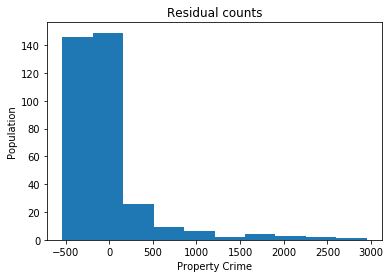

In [617]:
# Extract predicted values.
predicted = regr.predict(x).ravel()
actual = NY_Crime['Property_Crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Property Crime')
plt.ylabel('Population')
plt.show()

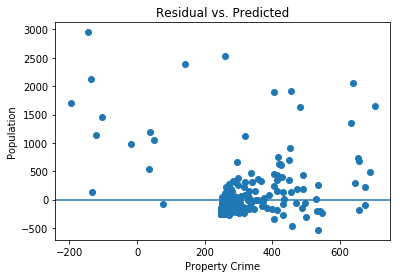

In [618]:
plt.scatter(predicted, residual)
plt.xlabel('Property Crime')
plt.ylabel('Population')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [619]:
correlation_matrix = x.corr()
display(correlation_matrix)

3,Population,Population2
3,,
Population,1.000,0.155
Population2,0.155,1.000


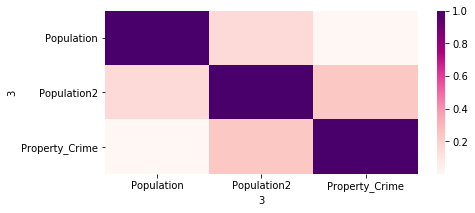

In [620]:
f, ax = plt.subplots(figsize=(7, 3))
sns.heatmap(NY_Crime.corr(), cmap="RdPu")

## We can see that Property Crime is very low on Population2 than Population.

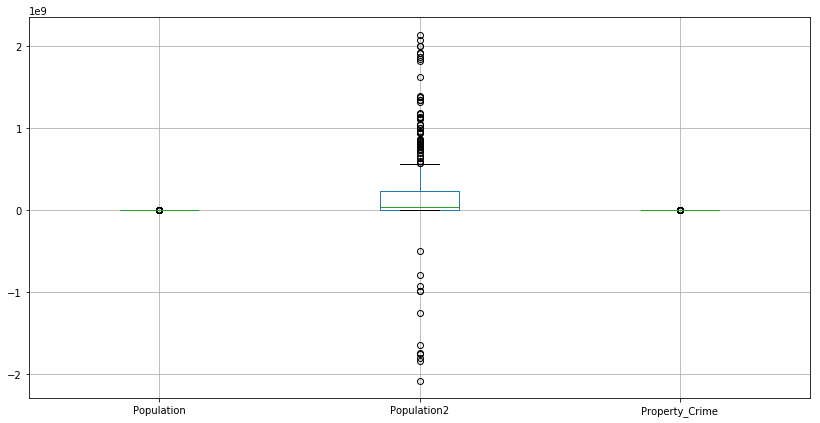

In [621]:
f, ax = plt.subplots(figsize=(14, 7))
NY_Crime.boxplot()

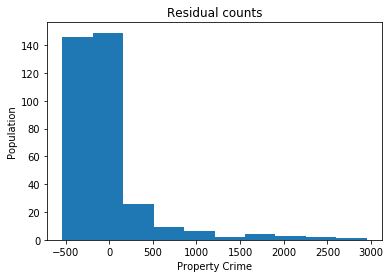

In [622]:
# Extract predicted values.
predicted1 = regr.predict(x).ravel()
actual1 = NY_Crime['Property_Crime']

# Calculate the error, also called the residual.
residual1 = actual1 - predicted1

# This looks a bit concerning.
plt.hist(residual1)
plt.title('Residual counts')
plt.xlabel('Property Crime')
plt.ylabel('Population')
plt.show()

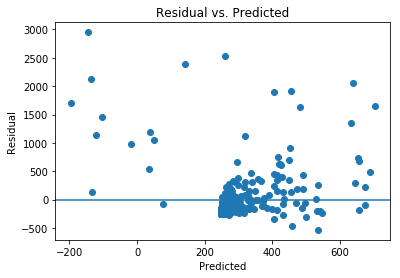

In [623]:
plt.scatter(predicted1, residual1)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [624]:
NY_Crime['log_Population'] = np.log(NY_Crime['Population'])
NY_Crime['log_Population2'] = np.log(NY_Crime['Population2'])
NY_Crime.head()

C:\Users\MESUPERSEXAYYY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


3,City,Population,Population2,Murder2,Robbery2,Property_Crime,log_Population,log_Population2
0,Adams Village,1861,3463321,Coded 0,Coded 0,12,7.529,15.058
1,Addison Town and Village,2577,6640929,Coded 0,Coded 0,24,7.854,15.709
2,Akron Village,2846,8099716,Coded 0,Coded 0,16,7.954,15.907
3,Albany,97956,1005443344,Coded 1,Coded 1,0,11.492,20.729
4,Albion Village,6388,40806544,Coded 0,Coded 1,223,8.762,17.524


In [625]:
regr = linear_model.LinearRegression()
y1 = NY_Crime['Property_Crime'].values.reshape(-1,1)

# Taking out Newspaper because that doesn't seem to add much value to the model, according to the coefficients.
x1 = NY_Crime[['log_Population', 'Population']]
regr.fit(x1, y1)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x1, y1))


Coefficients: 
 [[ 2.6353209e+02 -2.5003076e-04]]

Intercept: 
 [-2060.68949055]

R-squared:
0.4283720734823889


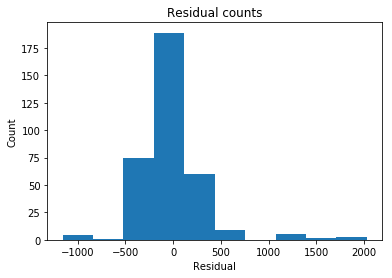

In [626]:

# Extract predicted values.
predicted2 = regr.predict(x1).ravel()
actual2 = NY_Crime['Property_Crime']

# Calculate the error, also called the residual.
residual2 = actual2 - predicted2

# This looks a bit concerning.
plt.hist(residual2)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# We can see improvement on our R2-Squared and graph.

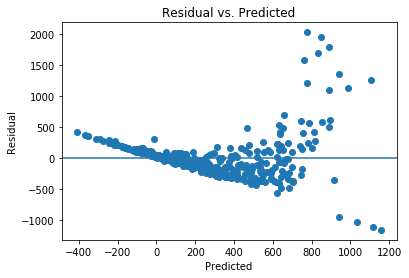

In [627]:
plt.scatter(predicted2, residual2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

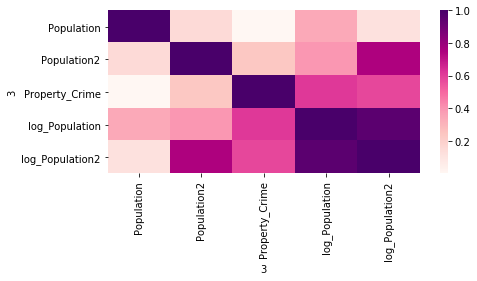

In [628]:
f, ax = plt.subplots(figsize=(7, 3))
sns.heatmap(NY_Crime.corr(), cmap="RdPu")

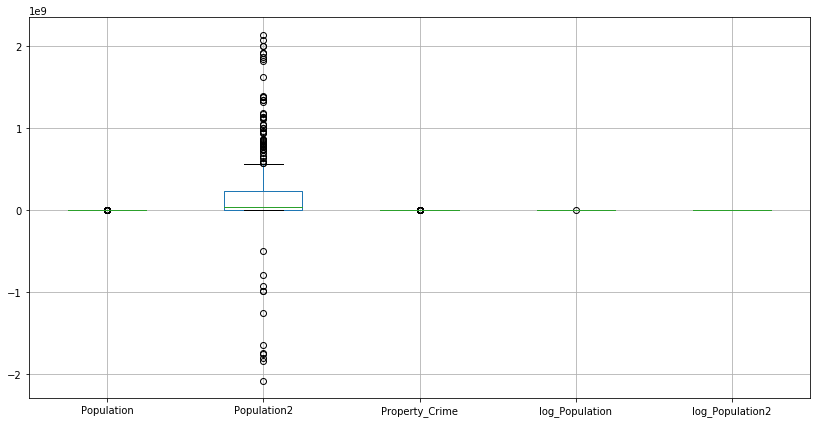

In [629]:
f, ax = plt.subplots(figsize=(14, 7))
NY_Crime.boxplot()

In [630]:
## With log('Population2) and Population2, we can predict that in the future, the property crime rate will decrease.
## This prediction have a 99.34 variance rate.